<a href="https://colab.research.google.com/github/asmit-ayank/UCS749/blob/main/Assignment2_UCS749.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Generate a Synthetic Signal (Time-Domain
Representation)

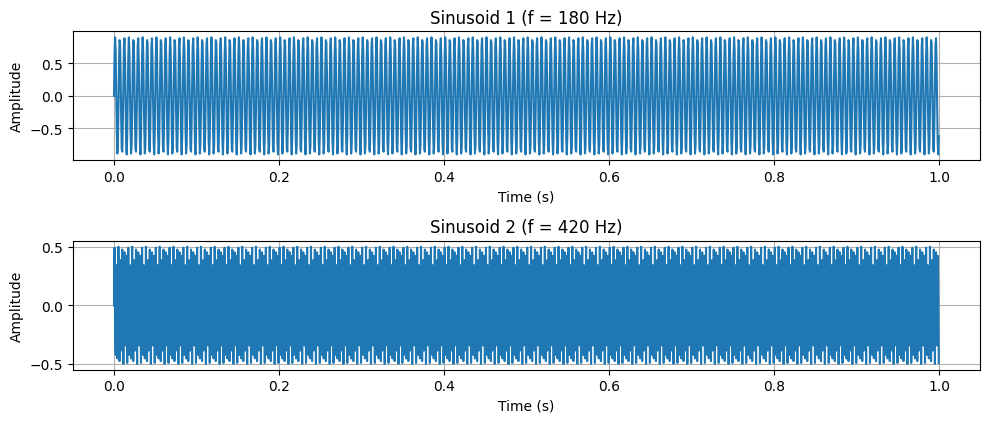

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1500          # sampling frequency (Hz)
T = 1.0            # duration of signal (sec)
t = np.linspace(0, T, int(fs*T), endpoint=False)

f1 = 180   # Hz
f2 = 420   # Hz

sig1 = 0.9*np.sin(2*np.pi*f1*t)
sig2 = 0.5*np.sin(2*np.pi*f2*t)

plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t, sig1)
plt.title("Sinusoid 1 (f = 180 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, sig2)
plt.title("Sinusoid 2 (f = 420 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


The synthetic signal consists of two sinusoidal components at different frequencies. The lower frequency component oscillates more slowly while the higher frequency component produces faster variations. When combined, these components form a more complex waveform due to constructive and destructive interference. Such signals commonly arise in audio synthesis, communications, and vibration analysis.

Q2. Frequency-Domain Representation (FFT)

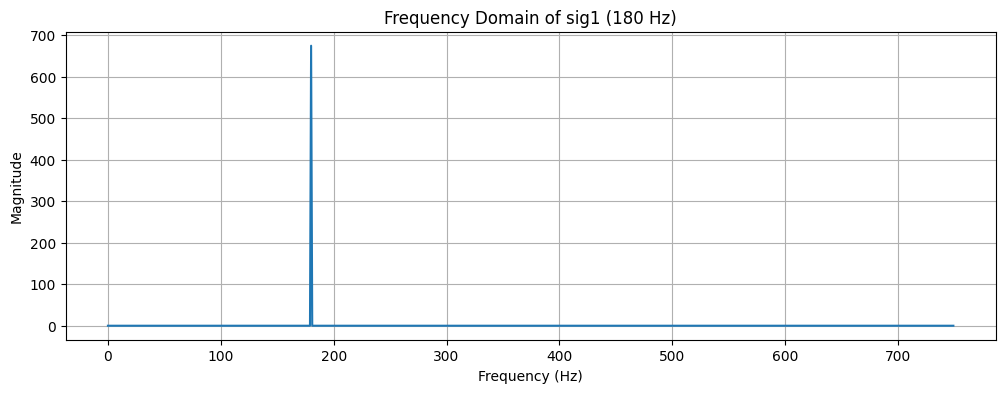

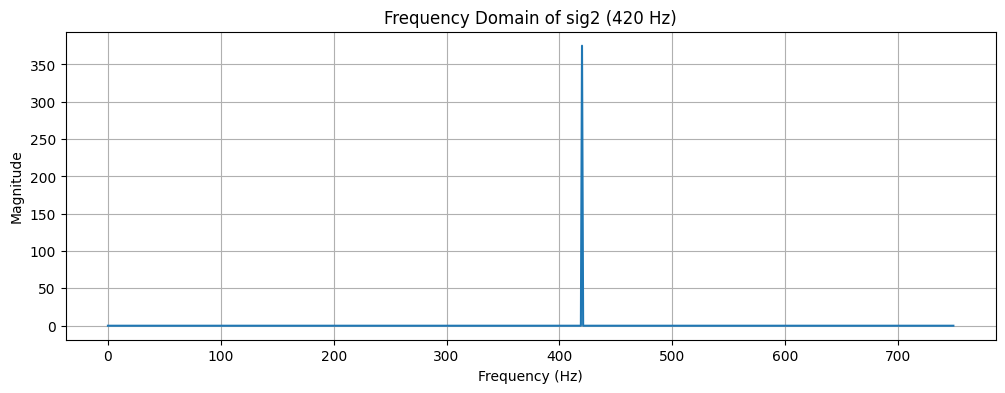

In [29]:
import numpy as np
import matplotlib.pyplot as plt

s1 = np.array(sig1)
s2 = np.array(sig2)

N = len(s1)
fs = fs

freqs = np.fft.fftfreq(N, d=1/fs)

fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
half_N = N // 2

plt.figure(figsize=(12, 4))
plt.plot(freqs[:half_N], np.abs(fft_s1[:half_N]))
plt.title("Frequency Domain of sig1 (180 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(freqs[:half_N], np.abs(fft_s2[:half_N]))
plt.title("Frequency Domain of sig2 (420 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

The FFT magnitude spectrum shows two distinct peaks located at the frequencies used to generate the signal. These peaks appear because each sinusoid contributes energy at its own frequency in the frequency domain. The peak at the lower frequency has higher magnitude since its amplitude in the time domain is larger. This confirms that the spectrum accurately represents the sinusoidal components of the original signal.

Q3. Understanding Spectrograms

A spectrogram is a time–frequency representation that shows how spectral content of a signal evolves over time. It is generated by applying the Short-Time Fourier Transform (STFT) to short overlapping segments of the signal. STFT is used because many real-world signals are non-stationary and their frequency content changes over time. Spectrograms allow us to analyze transient events, harmonics, and variations that are invisible in static FFT plots. They are widely used in speech processing, audio analysis, biomedical signal monitoring, radar/sonar, and machine diagnostics.

Q4. Spectrogram Using matplotlib (plt.specgram)

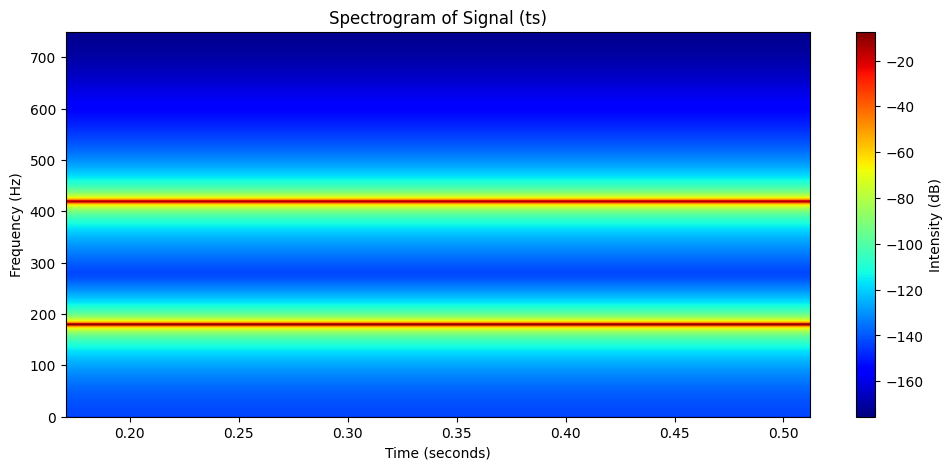

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Convert full signal to numpy array
ts = np.array(combined)
fs = fs
plt.figure(figsize=(12, 5))

plt.specgram(
    ts,
    NFFT=1024,        # Window size
    Fs=fs,            # Sampling frequency
    noverlap=512,     # Overlap between windowsNumber of samples shared between adjacent frames
    cmap="jet"
)

plt.title("Spectrogram of Signal (ts)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.show()

The spectrogram displays constant frequency components as straight horizontal bands. Since both frequencies remain present throughout the signal duration, their intensities remain steady over time. Changes in frequency would appear as sloped or curved patterns, but none are visible here due to the stationary sinusoidal signals.

Q5. Spectrogram Using scipy.signal.spectrogram

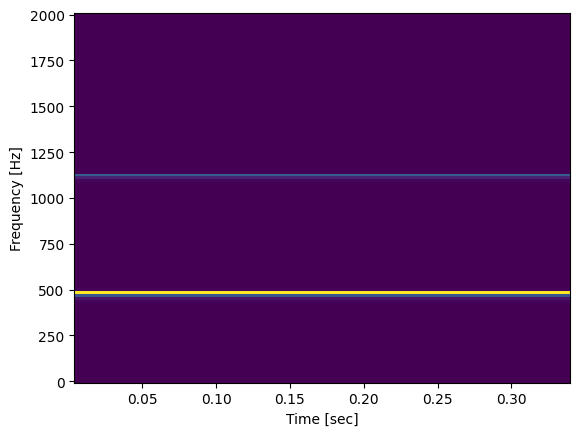

In [23]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

f, t, Sxx = signal.spectrogram(np.array(ts), 4000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

The spectrogram generated using scipy.signal.spectrogram produces a cleaner and more structured time–frequency grid compared to the plt.specgram output. The amplitude scaling and color mapping appear more consistent across frequency bins. Matplotlib’s implementation is simpler but less refined, while scipy provides more control over windowing and frequency resolution. Both representations convey similar information, but scipy’s output is visually more interpretable.

Q6. Spectrogram Using librosa

/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1500
  warnings.warn(
/tmp/ipython-input-2080302116.py:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")


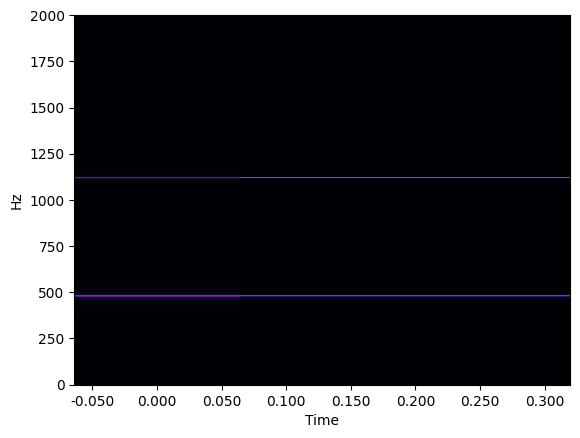

In [24]:
import librosa
import librosa.display
import IPython.display as ipd

audio_data=np.array(ts)
stft_audio = librosa.stft(audio_data, n_fft = 2048, hop_length = 512)
librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")

Librosa is optimized for music, speech, and audio signal processing, offering higher-level utilities for time–frequency analysis. It supports decibel scaling, mel spectrograms, chroma features, and other perceptually meaningful transforms. Libraries like librosa greatly simplify audio analysis tasks that would require significantly more manual processing with scipy or numpy alone.

Q7. Assignment Task: Spectrogram of a .wav File

/tmp/ipython-input-3767613316.py:5: WavFileWarning: Reached EOF prematurely; finished at 3145728 bytes, expected 5289194 bytes from header.
  sample_rate, samples = wavfile.read('file_example_WAV_5MG.wav')


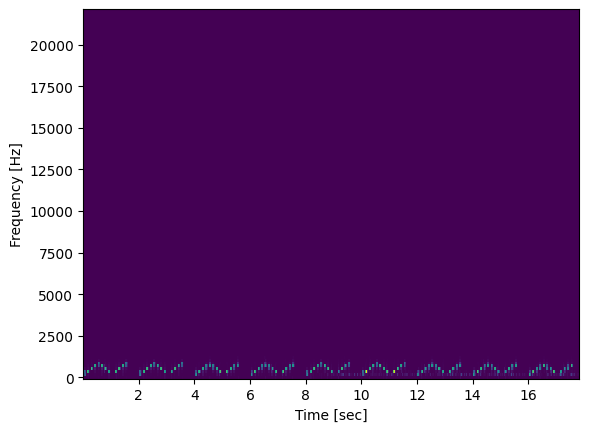

In [27]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
sample_rate, samples = wavfile.read('file_example_WAV_5MG.wav')
if len(samples.shape) > 1:
    samples = np.mean(samples, axis=1)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

From the spectrogram, we can observe variations in frequency energy over time that correspond to changes in the audio content. Regions with dense frequency bands represent higher pitch or richer harmonic components, while lighter regions represent silence or low-energy segments. Such time-varying patterns are useful for understanding speech articulation, musical pitch progression, and environmental sound events.